## Решающие деревья

#Назаров А.М. НПМ-01-22

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

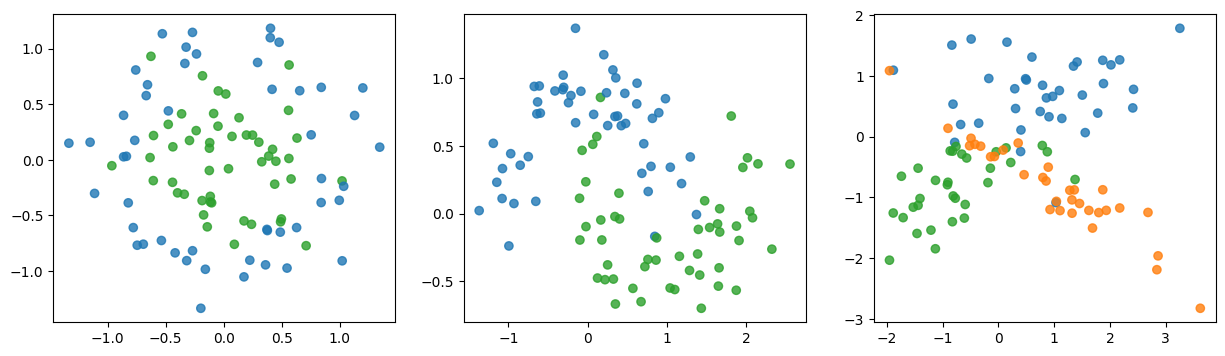

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

Tree Depth 3:
  Accuracy на обучающей выборке: 0.94
  Accuracy на тестовой выборке: 0.87
  Переобучение: Да



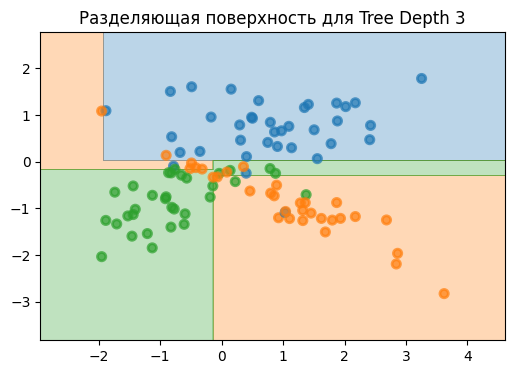

Min Samples Split 10:
  Accuracy на обучающей выборке: 0.94
  Accuracy на тестовой выборке: 0.83
  Переобучение: Да



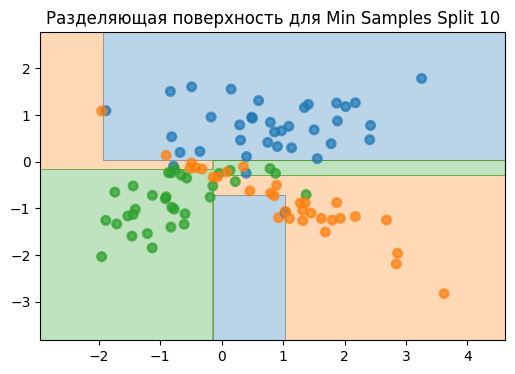

Min Samples Leaf 5:
  Accuracy на обучающей выборке: 0.90
  Accuracy на тестовой выборке: 0.77
  Переобучение: Да



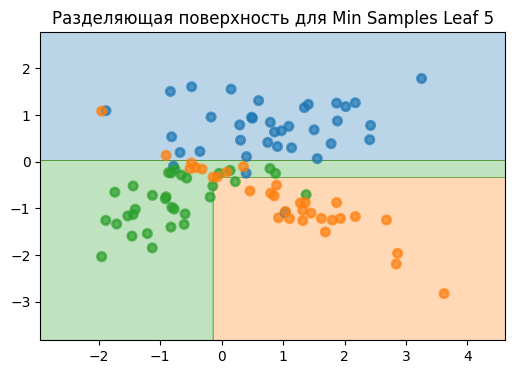

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Датасет, с которым будем работать
X, y = datasets[2]  # Используем третий датасет для примера
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Три классификатора на основе дерева решений с разными параметрами
classifiers = {
    "Tree Depth 3": DecisionTreeClassifier(max_depth=3),
    "Min Samples Split 10": DecisionTreeClassifier(min_samples_split=10),
    "Min Samples Leaf 5": DecisionTreeClassifier(min_samples_leaf=5)
}

# Обучение и оценка каждого классификатора
for name, clf in classifiers.items():
    # Обучаем модель
    clf.fit(X_train, y_train)

    # Оценка точности на обучающей и тестовой выборках
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    print(f"{name}:")
    print(f"  Accuracy на обучающей выборке: {train_accuracy:.2f}")
    print(f"  Accuracy на тестовой выборке: {test_accuracy:.2f}")
    print(f"  Переобучение: {'Да' if train_accuracy > test_accuracy else 'Нет'}\n")

    # Построение разделяющей поверхности
    plt.figure(figsize=(6, 4))
    plot_surface(clf, X, y)
    plt.title(f"Разделяющая поверхность для {name}")
    plt.show()


__Ответ:__

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

max_depth=1, min_samples_leaf=1
  Accuracy на обучающей выборке: 0.67
  Accuracy на тестовой выборке: 0.60
  Переобучение: Да



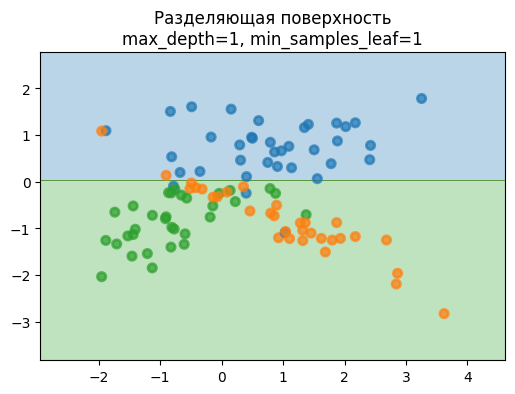

max_depth=1, min_samples_leaf=5
  Accuracy на обучающей выборке: 0.67
  Accuracy на тестовой выборке: 0.60
  Переобучение: Да



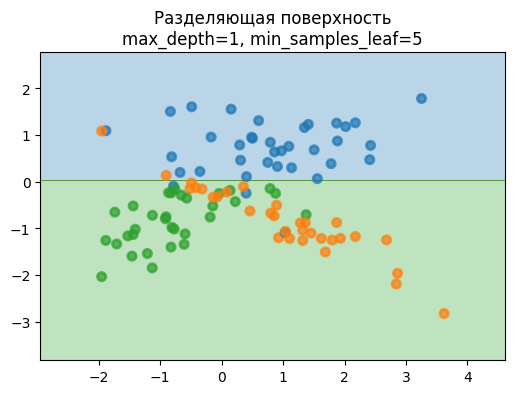

max_depth=1, min_samples_leaf=10
  Accuracy на обучающей выборке: 0.67
  Accuracy на тестовой выборке: 0.60
  Переобучение: Да



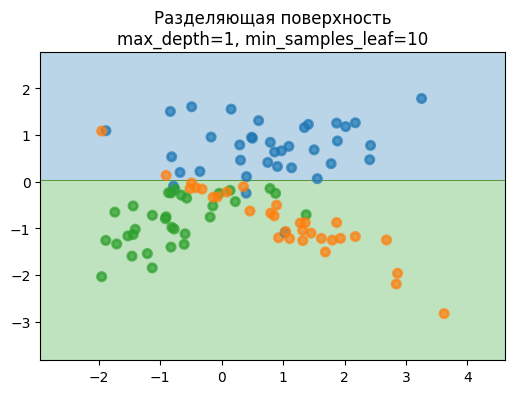

max_depth=3, min_samples_leaf=1
  Accuracy на обучающей выборке: 0.94
  Accuracy на тестовой выборке: 0.87
  Переобучение: Да



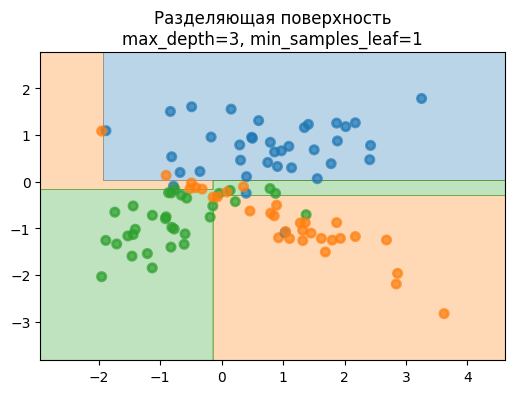

max_depth=3, min_samples_leaf=5
  Accuracy на обучающей выборке: 0.89
  Accuracy на тестовой выборке: 0.77
  Переобучение: Да



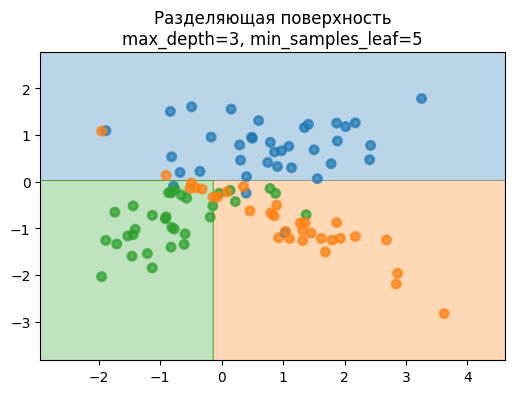

max_depth=3, min_samples_leaf=10
  Accuracy на обучающей выборке: 0.89
  Accuracy на тестовой выборке: 0.77
  Переобучение: Да



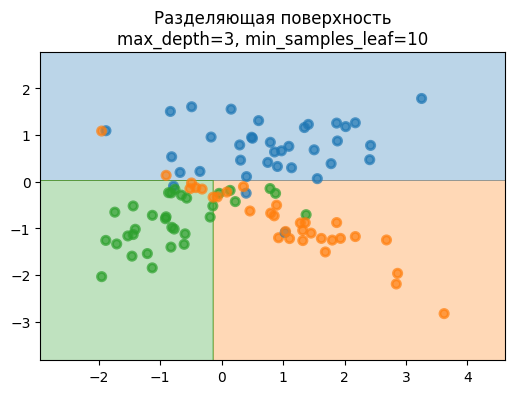

max_depth=5, min_samples_leaf=1
  Accuracy на обучающей выборке: 0.97
  Accuracy на тестовой выборке: 0.80
  Переобучение: Да



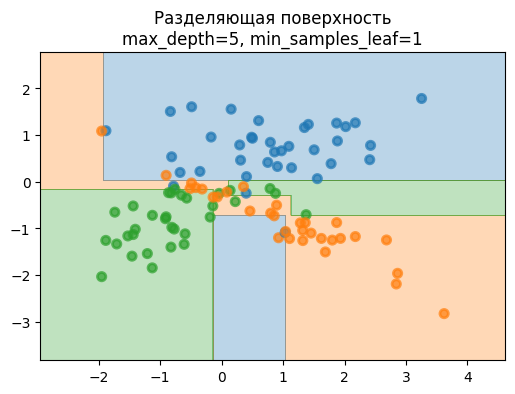

max_depth=5, min_samples_leaf=5
  Accuracy на обучающей выборке: 0.90
  Accuracy на тестовой выборке: 0.70
  Переобучение: Да



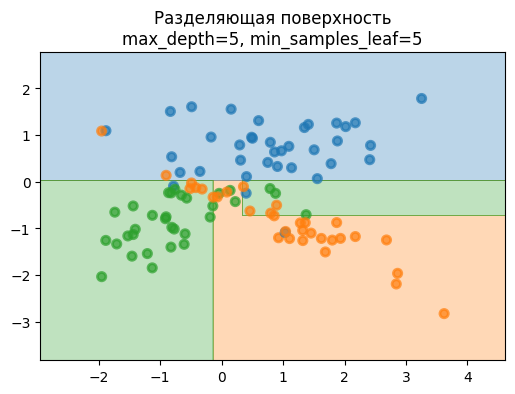

max_depth=5, min_samples_leaf=10
  Accuracy на обучающей выборке: 0.89
  Accuracy на тестовой выборке: 0.77
  Переобучение: Да



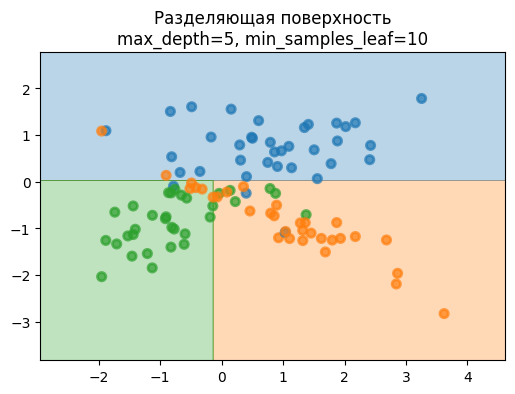

max_depth=None, min_samples_leaf=1
  Accuracy на обучающей выборке: 1.00
  Accuracy на тестовой выборке: 0.83
  Переобучение: Да



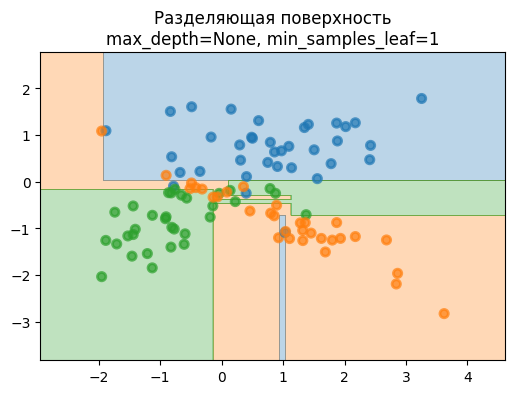

max_depth=None, min_samples_leaf=5
  Accuracy на обучающей выборке: 0.90
  Accuracy на тестовой выборке: 0.70
  Переобучение: Да



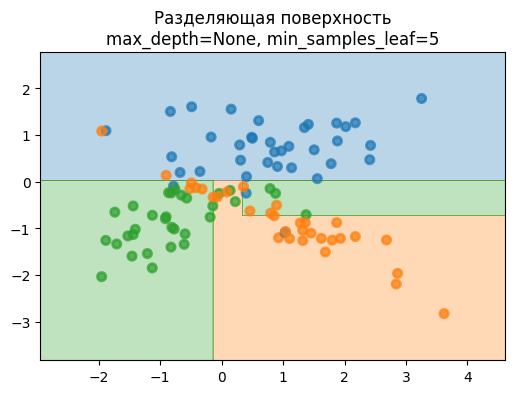

max_depth=None, min_samples_leaf=10
  Accuracy на обучающей выборке: 0.89
  Accuracy на тестовой выборке: 0.77
  Переобучение: Да



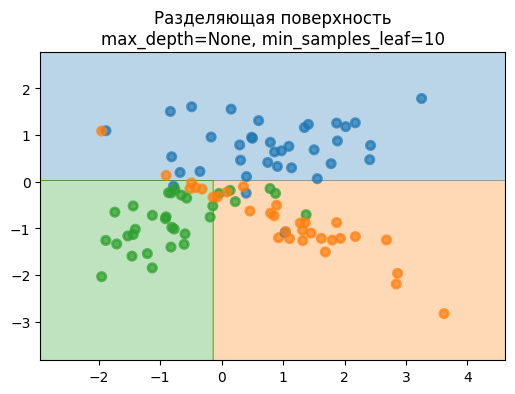

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


depths = [1, 3, 5, None]
min_samples_leaf_values = [1, 5, 10]

for max_depth in depths:
    for min_samples_leaf in min_samples_leaf_values:

        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
        clf.fit(X_train, y_train)

        train_accuracy = accuracy_score(y_train, clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, clf.predict(X_test))

        print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
        print(f"  Accuracy на обучающей выборке: {train_accuracy:.2f}")
        print(f"  Accuracy на тестовой выборке: {test_accuracy:.2f}")
        print(f"  Переобучение: {'Да' if train_accuracy > test_accuracy else 'Нет'}\n")

        plt.figure(figsize=(6, 4))
        plot_surface(clf, X, y)
        plt.title(f"Разделяющая поверхность\nmax_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
        plt.show()


__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [51]:
from collections import Counter

def find_best_split(feature_vector, target_vector):
    unique_values = np.unique(feature_vector)

    if len(unique_values) < 2:
        return np.array([]), np.array([]), None, -1

    thresholds = (unique_values[:-1] + unique_values[1:]) / 2

    ginis = np.zeros(thresholds.shape)

    for i, thres in enumerate(thresholds):
        left_mask = feature_vector < thres
        right_mask = ~left_mask

        left_counts = Counter(target_vector[left_mask])
        right_counts = Counter(target_vector[right_mask])

        left_size = left_mask.sum()
        right_size = right_mask.sum()

        p_left_0 = left_counts[0] / left_size if left_size > 0 else 0
        p_left_1 = left_counts[1] / left_size if left_size > 0 else 0

        p_right_0 = right_counts[0] / right_size if right_size > 0 else 0
        p_right_1 = right_counts[1] / right_size if right_size > 0 else 0

        H_left = 1 - (p_left_0 ** 2 + p_left_1 ** 2)
        H_right = 1 - (p_right_0 ** 2 + p_right_1 ** 2)

        ginis[i] = -(left_size / target_vector.shape[0]) * H_left - (right_size / target_vector.shape[0]) * H_right

    gini_best_index = np.argmax(ginis)

    thresholds_best = thresholds[gini_best_index]
    gini_best_value = ginis[gini_best_index]

    return thresholds, ginis, thresholds_best, gini_best_value

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


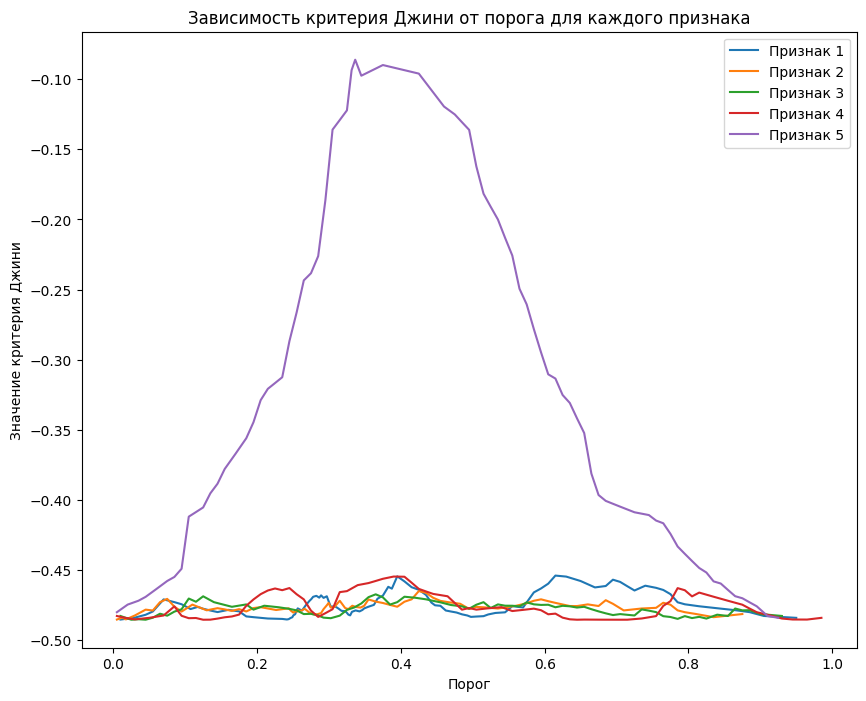

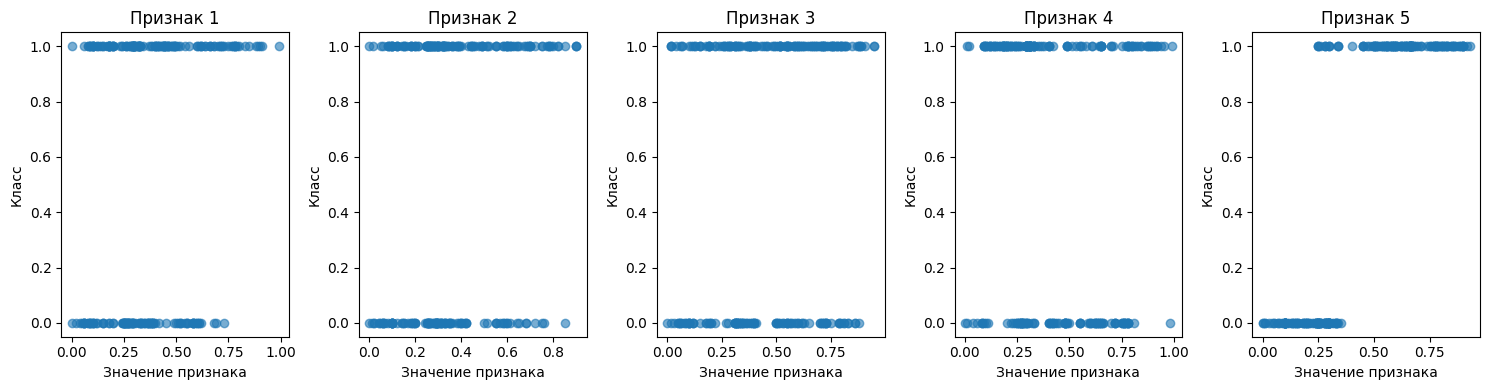

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('/content/drive/MyDrive/student_train.tsv', sep='\t')
X = data.iloc[:, :-1].values  # Первые пять столбцов - признаки
y = data.iloc[:, -1].values   # Последний столбец - целевая переменная

plt.figure(figsize=(10, 8))
for i in range(5):
    feature_vector = X[:, i]
    thresholds, ginis, _, _ = find_best_split(feature_vector, y)
    plt.plot(thresholds, ginis, label=f'Признак {i + 1}')
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')
plt.title('Зависимость критерия Джини от порога для каждого признака')
plt.legend()
plt.show()

# Построение scatter-графиков "значение признака — класс"
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i in range(5):
    axes[i].scatter(X[:, i], y, alpha=0.6)
    axes[i].set_title(f'Признак {i + 1}')
    axes[i].set_xlabel('Значение признака')
    axes[i].set_ylabel('Класс')
plt.tight_layout()
plt.show()


__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Наилучшим признаком для разделения классов является признак 5, что подтверждается самым высоким индексом Джини. Это также видно из графика распределения классов: классы четко разделены, при этом значения меньше 0.75 соответствуют классу 0, а значения больше 1 — классу 1. Идеальная форма "кривой Джини" напоминает гауссову кривую, которая обеспечивает четкое разделение классов. В отличие от этого, "плохие признаки" показывают осцилляции, имеют несколько экстремумов и не обеспечивают надежного разделения, что усложняет процесс классификации.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [46]:
from sklearn.base import BaseEstimator
class DecisionTree(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):

        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    current_click = clicks[key] if key in clicks else 0
                    ratio[key] = current_click / current_count if current_count > 0 else 0
                sorted_categories = sorted(ratio, key=ratio.get)
                categories_map = {k: i for i, k in enumerate(sorted_categories)}
                feature_vector = np.array([categories_map[x] for x in sub_X[:, feature]])
            else:
                raise ValueError("Unknown feature type")

            if len(np.unique(feature_vector)) < 2:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold
                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = [k for k, v in categories_map.items() if v < threshold]

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError("Unknown feature type")

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"])

    def _predict_node(self, x, node):

        if node["type"] == "terminal":
            return node["class"]

        feature = node["feature_split"]
        if self._feature_types[feature] == "real":
            if x[feature] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        elif self._feature_types[feature] == "categorical":
            if x[feature] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            raise ValueError("Unknown feature type")

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        return np.array([self._predict_node(x, self._tree) for x in X])

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [49]:
from sklearn.preprocessing import LabelEncoder

column_names = [
    'class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
    'odor', 'gill_attachment', 'gill_spacing', 'gill_size',
    'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
    'stalk_surface_below_ring', 'stalk_color_above_ring',
    'stalk_color_below_ring', 'veil_type', 'veil_color',
    'ring_number', 'ring_type', 'spore_print_color',
    'population', 'habitat'
]
data = pd.read_csv('/content/drive/MyDrive/agaricus-lepiota.data', header=None, names=column_names)
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)


y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
<!--- * [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)-->
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [67]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

mushrooms = pd.read_csv('/content/drive/MyDrive/agaricus-lepiota.data')
cars = pd.read_csv('/content/drive/MyDrive/car.data')
nursery = pd.read_csv('/content/drive/MyDrive/nursery.data')

In [68]:
mushrooms['class'] = mushrooms.iloc[:, 0].map({'e': 0, 'p': 1})
cars['class'] = cars.iloc[:, -1].map({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})
nursery['class'] = nursery.iloc[:, -1].map({'not_recom': 0, 'recommend': 0,
                                            'very_recom': 1, 'priority': 1, 'spec_prior': 1})

datasets = {
    'mushrooms': mushrooms,
    'cars': cars,
    'nursery': nursery
}
results = pd.DataFrame(columns=['Dataset', 'DecisionTree (real)', 'DecisionTree (categorical)',
                                 'DecisionTree (one-hot)', 'DecisionTreeClassifier'])

In [74]:
def encode_categorical_features(X):
    """Encode categorical features using Label Encoding."""
    label_encoders = {}
    for column in X.columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le
    return X, label_encoders

def evaluate_decision_trees(X, y):
    """Evaluate different Decision Tree models and return their scores."""
    results = {}

    dt_real = DecisionTreeClassifier()
    scores_real = cross_val_score(dt_real, X, y, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTree (real)'] = scores_real.mean()

    dt_categorical = DecisionTreeClassifier()
    scores_categorical = cross_val_score(dt_categorical, X, y, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTree (categorical)'] = scores_categorical.mean()

    one_hot_encoder = OneHotEncoder(sparse_output=False)
    X_one_hot = one_hot_encoder.fit_transform(X)
    dt_one_hot = DecisionTreeClassifier()
    scores_one_hot = cross_val_score(dt_one_hot, X_one_hot, y, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTree (one-hot)'] = scores_one_hot.mean()

    dt_classifier = DecisionTreeClassifier()
    scores_classifier = cross_val_score(dt_classifier, X, y, cv=10, scoring=make_scorer(accuracy_score))
    results['DecisionTreeClassifier'] = scores_classifier.mean()

    return results

results_list = []

for dataset_name, dataset in datasets.items():
    X = dataset.drop(columns='class')
    y = dataset['class']

    X, label_encoders = encode_categorical_features(X)

    results = evaluate_decision_trees(X, y)
    results['Dataset'] = dataset_name

    results_list.append(results)

results_df = pd.DataFrame(results_list)

results_df.set_index('Dataset', inplace=True)
print(results_df)


           DecisionTree (real)  DecisionTree (categorical)  \
Dataset                                                      
mushrooms             1.000000                    1.000000   
cars                  1.000000                    1.000000   
nursery               0.987269                    0.987269   

           DecisionTree (one-hot)  DecisionTreeClassifier  
Dataset                                                    
mushrooms                1.000000                1.000000  
cars                     1.000000                1.000000  
nursery                  0.999923                0.987269  


__16. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
Алгоритмы проявляют различные результаты в зависимости от типа данных. Например, для грибов точность классификации остается высокой независимо от выбранного подхода, тогда как для автомобилей качество классификации значительно снижается при использовании категориального кодирования. В данном примере элемент случайности не наблюдается, что делает результаты менее предсказуемыми.